# Dog Binary Classifier: Afghan Greyhound vs Bedlington
### Logistic Regression Neural Network model

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py 
from PIL import Image

In [ ]:
classes = ["Afghan Greyhound", "Bedlington"]

[Here](https://drive.google.com/file/d/1xFBFvnUdIOdHNiEy7QIy0HF7RO256949/view?usp=sharing) are the h5 files containing the data that we'll use to train and test our model.

In [ ]:
trainSet = h5py.File('/content/dogs_train.h5', 'r')
testSet = h5py.File('/content/dogs_test.h5', 'r')

Using ```dataSet.keys()```, we can see what's inside of these files.

In [ ]:
# Using .keys() method to view what's inside 
print(trainSet.keys())
print(testSet.keys())

<KeysViewHDF5 ['dogs_train_x', 'dogs_train_y']>
<KeysViewHDF5 ['dogs_test_x', 'dogs_test_y']>



Now that we know the name of the keys to access the data, we'll separate them and store them into train and test arrays.

In [ ]:
train_x = np.array(trainSet['dogs_train_x'][:])
train_y = np.array(trainSet['dogs_train_y'][:])
test_x = np.array(testSet['dogs_test_x'][:])
test_y = np.array(testSet['dogs_test_y'][:])

In [ ]:
print(train_x.shape)
num_px = train_x.shape[1]
print(num_px)

(249, 100, 100, 3)
100


* **Normalizing the data:**

*Note:* he have to add a decimal point to the divisor so that we get float values

In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.

Range: min = 0 and max = 1

In [ ]:
print('train_images min =', train_x.min())
print('train_images max =', train_x.max())
print('test_images min =', test_x.min())
print('test_images max =', test_x.max())

train_images min = 0.0
train_images max = 1.0
test_images min = 0.0
test_images max = 1.0


* **Reshaping the data:**

In [ ]:
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T

If we look into our y values dimension, we'll see that it's a 1D array, so we have to add an extra dimension so that it matches out x values, which are 2D.

In [ ]:
#[[0,1,0,1,0]] (1,5)
#train_y.reshape((1,train_y.shgape[0]))
train_y = np.expand_dims(train_y, 0)
test_y = np.expand_dims(test_y, 0)



<table style="width:35%">
  <tr>
    <td>train_x shape</td>
    <td> (30000, 249)</td> 
  </tr>
  <tr>
    <td>train_y shape</td>
    <td>(1, 249)</td> 
  </tr>
  <tr>
    <td>test_x shape</td>
    <td>(30000, 85)</td> 
  </tr>
  <tr>
    <td>test_y shape</td>
    <td>(1, 85)</td> 
  </tr>
</table>

In [ ]:
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

train_x shape: (30000, 249)
train_y shape: (1, 249)
test_x shape: (30000, 85)
test_y shape: (1, 85)


* **Visualizing the content of the datasets:**

There's a balanced amount of samples for each dog breed, which is good.

Galgo afgano : 123
Bedlington : 126


<BarContainer object of 2 artists>

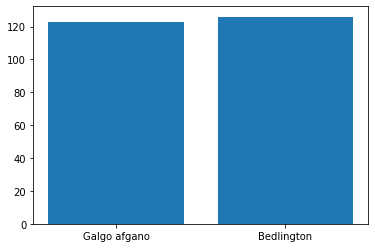

In [ ]:
y_train = [list(train_y[0]).count(0), list(train_y[0]).count(1)]
print(classes[0], ':', list(train_y[0]).count(0))
print(classes[1], ':', list(train_y[0]).count(1))
plt.bar(classes, y_train)

Galgo afgano : 42
Bedlington : 43


<BarContainer object of 2 artists>

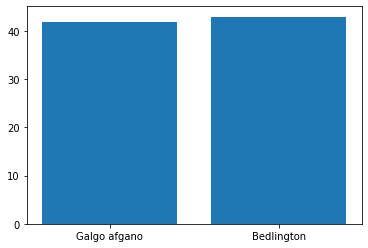

In [ ]:
y_test = [list(test_y[0]).count(0), list(test_y[0]).count(1)]
print(classes[0], ':', list(test_y[0]).count(0))
print(classes[1], ':', list(test_y[0]).count(1))
plt.bar(classes, y_test)

* **Building our logistic regression model:**

Sigmoid function (activation function):

$$σ = 1 / (1+e^{(-z)})$$

In [ ]:
def sigmoid(z):
  s = 1 / (1 + np.exp(-z))
  return s

In [ ]:
# Should return [0.5        0.88079708]
print (str(sigmoid(np.array([0,2]))))

[0.5        0.88079708]


Initialize with zeros function - it'll create a 1D array for the weights (w) and a float variable for the bias (b)

In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0. 
    return w, b

In [ ]:
# Should return w = [[0.],[0.]] b = 0.0
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float, "b no es flotante"
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


* **Propagate function** - it'll return the gradients of w and b, and the cost.

To get these values, we'll make a prediction with this ecuation:

$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

Cost - loss function:

$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

W and b gradients:
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [ ]:
def propagate(w, b, X, Y):

  m = X.shape[1]

  A = sigmoid(np.dot((w.T), X) + b)

  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

  dw = (1/m) * np.dot(X, (A - Y).T)
  
  db = (1/m) * np.sum(A - Y)

  cost = np.squeeze(np.array(cost))
  grads = {"dw": dw,
            "db": db}
  
  return grads, cost

In [ ]:
# Should return:
#dw = [[0.99845601]
# [2.39507239]]
#db = 0.001455578136784208
#cost = 5.801545319394553

In [ ]:
w =  np.array([[1.], [2.]])
b = 2.
X = np.array([[1., 2., -1.], [3., 4., -3.2]])
Y = np.array([[1, 0, 1]])
grads, cost = propagate(w, b, X, Y)

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


* **Optimization function:** 

Returns optimized values of w and b

$ \theta = \theta - \alpha \text{ } d\theta$

Where $ \theta$ represents w or b, and $\alpha$ represents the learning rate


In [ ]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):

  w = copy.deepcopy(w)
  b = copy.deepcopy(b)

  costs = []

  for i in range(num_iterations):

    grads, cost = propagate(w, b, X, Y)

    dw = grads['dw']
    db = grads['db']

    w -= learning_rate * dw
    b -= learning_rate * db

    if i % 100 == 0 :
      costs.append(cost)

      if print_cost:
        print ("Cost after iteration %i: %f" %(i, cost))
    
  params = {"w": w,
            "b": b}
  
  return params, costs

In [ ]:
# Should return:
#dw = [[0.99845601]
# [2.39507239]]
#db = 0.001455578136784208
#Costs = [array(5.80154532)]

In [ ]:
params, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
Costs = [array(5.80154532)]


In [ ]:
class Model():

  def __init__(self, modelType):
    self.modelType = modelType  


  def fit(self,X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    self.w, self.b = initialize_with_zeros(X_train.shape[0])


    parameters, costs = optimize(self.w, self.b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    self.w = parameters['w']
    self.b = parameters['b']

    Y_prediction_test = self.predict(X_test)
    Y_prediction_train = self.predict(X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
 
    self.costs = costs
    self.lr = learning_rate
    

  def predict(self, X):
    # This method expects a (30000,  n images) array
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))

    # try/except to catch if the w attribut exists
    try:

      self.w = self.w.reshape(X.shape[0], 1)
      # Declare A to obtain the input data predictions, like in the propagate function 
      A = sigmoid(np.dot((self.w.T), X) + self.b)
      
      for i in range(A.shape[1]):
        # For values bigger than 0.5, store the value 1. Else, store 0.
        if A[0, i] > 0.5:
          Y_prediction[0, i] = 1
        else:
          Y_prediction[0, i] = 0
      
      return Y_prediction

    except AttributeError:
      print('No existe el atributo self.w')

* **Instantiating the model:**

In [ ]:
dogModel = Model("logistic_regression")

In [ ]:
dogModel.predict(np.array([[1,2,3,4,5]]))

No existe el atributo self.w


* **Training the model:**

*Hyperparameters: learning rate and number of iterations*

In [ ]:
num_iterations = 1000
lr = 0.001
dogModel.fit(train_x, train_y, test_x, test_y, num_iterations, lr, True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.442262
Cost after iteration 200: 0.380083
Cost after iteration 300: 0.342466
Cost after iteration 400: 0.314581
Cost after iteration 500: 0.292076
Cost after iteration 600: 0.273078
Cost after iteration 700: 0.256603
Cost after iteration 800: 0.242065
Cost after iteration 900: 0.229083
train accuracy: 96.3855421686747 %
test accuracy: 82.35294117647058 %


Ahora ve los cambios del valor de costo en cada iteracion si no es una curva como la que vimos en clase repite con otros valores hasta hallar los valores correctos

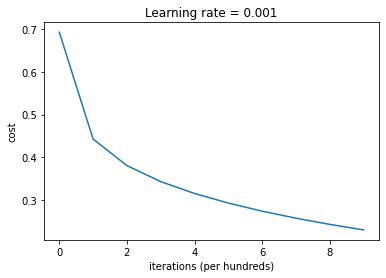

In [ ]:
costs = dogModel.costs
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(dogModel.lr))
plt.show()

y = 1, you predicted that it is a "Bedlington" picture.


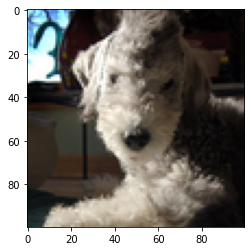

In [ ]:
i = 5
plt.imshow(test_x[:, i].reshape((num_px, num_px, 3)))
print ("y = " + str(test_y[0, i]) + ", you predicted that it is a \""+ classes[int(test_y[0, i])] +  "\" picture.")

y = 0, you predicted that it is a "Galgo afgano" picture.


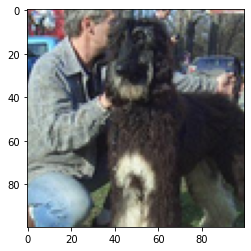

In [ ]:
i = 51
plt.imshow(test_x[:, i].reshape((num_px, num_px, 3)))
print ("y = " + str(test_y[0, i]) + ", you predicted that it is a \""+ classes[int(test_y[0, i])] +  "\" picture.")

Testing the model with an input photo:

*Note:* The image must be processed to be the same dimensions as the dataset images (30000, 1) - 1 means that it's only one image.

La predicion de esta imagen es: Bedlington


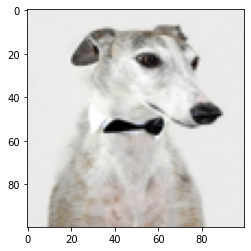

In [ ]:
image = np.array(Image.open('dog_test_galgo.jpg').resize((num_px, num_px))) # input image
plt.imshow(image)
image = image/255. 
image = image.reshape(1, -1).T 

y_hat = dogModel.predict(image)
print(f"La predicion de esta imagen es: {classes[int(y_hat[0,0])]}")